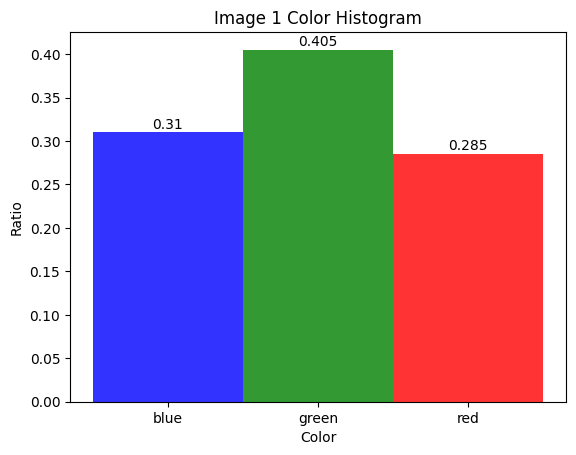

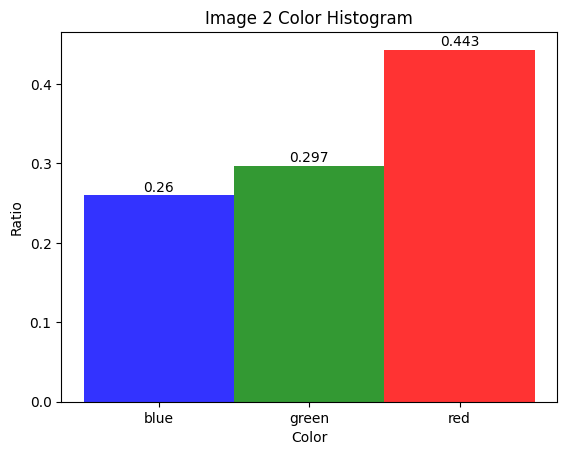

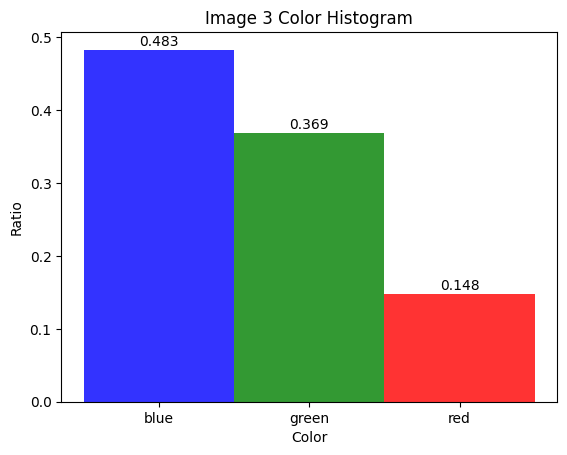

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# Create a color histogram

def make_color_histogram(index):
    # Read the image in color mode
    img = cv2.imread(f'images/img{index}.jpg', cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error: Unable to read images/img{index}.jpg")
        return

    # Initialize RGB sum values
    blue, green, red = 0, 0, 0

    # Calculate the sum of the blue, green, and red channel values
    blue = np.sum(img[:, :, 0])
    green = np.sum(img[:, :, 1])
    red = np.sum(img[:, :, 2])

    # Calculate the total sum and normalize each color channel ratio
    total_sum = blue + green + red
    if total_sum == 0:
        print(f"Warning: Zero intensity found in images/img{index}.jpg")
        return
    
    color_ratios = [round(blue / total_sum, 3), round(green / total_sum, 3), round(red / total_sum, 3)]

    # Plotting the color histogram
    colors = ['blue', 'green', 'red']
    plt.bar(colors, color_ratios, color=colors, alpha=0.8, width=1.0)  # Set bar color and transparency
    plt.xlabel('Color')
    plt.ylabel('Ratio')
    plt.title(f'Image {index} Color Histogram')

    # Add labels for each bar
    for color, ratio in zip(colors, color_ratios):
        plt.text(color, ratio + 0.001, f'{ratio}', ha='center', va='bottom')

    # Create output directory if it doesn't exist
    output_dir = "color-hist"
    os.makedirs(output_dir, exist_ok=True)

    plt.savefig(os.path.join(output_dir, f'img{index}.jpg'))
    plt.show()
    plt.close()

for i in range(1, 4):
    make_color_histogram(i)


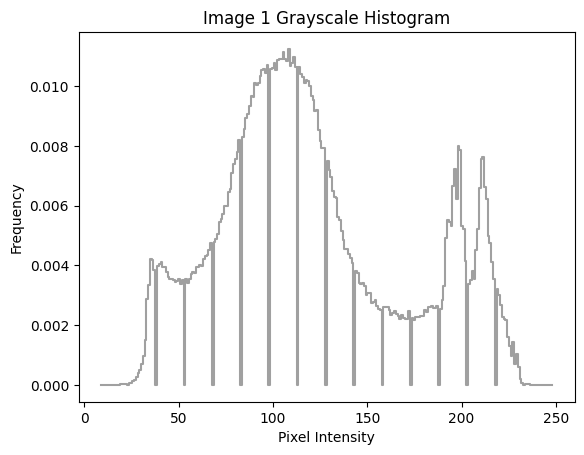

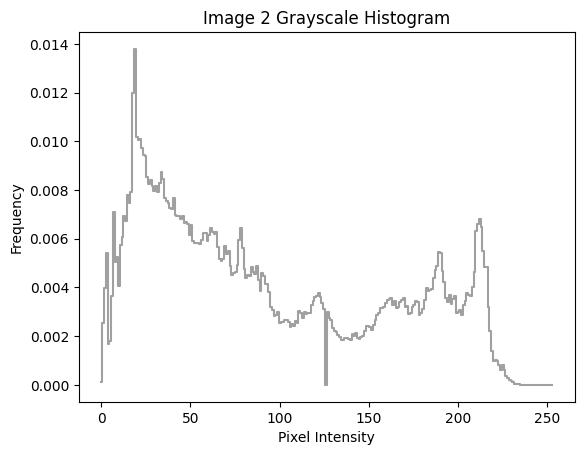

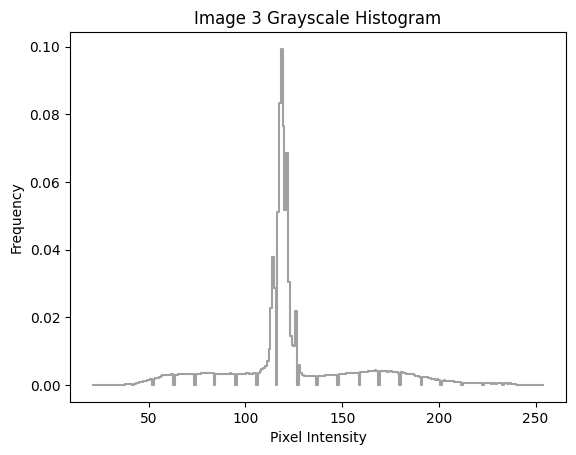

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# Function to create and save a grayscale histogram
def make_gray_histogram(index):
    img = cv2.imread(f'images/img{index}.jpg', cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Unable to read images/img{index}.jpg")
        return
    
    # Flatten the grayscale image to a 1D array
    ravel_img = img.ravel()

    # Calculate the histogram data
    hist, bins = np.histogram(ravel_img, bins=256, density=True)

    # Use plt.step() to plot the histogram as a step function
    plt.step(bins[:-1], hist, color='gray', where='mid', alpha=0.75)
    plt.title(f'Image {index} Grayscale Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')



    # Create output directory if it doesn't exist
    output_dir = "gray-hist"
    os.makedirs(output_dir, exist_ok=True)


    plt.savefig(os.path.join(output_dir, f'img{index}.jpg'))
    plt.show()
    plt.close()

for i in range(1, 4):
    make_gray_histogram(i)


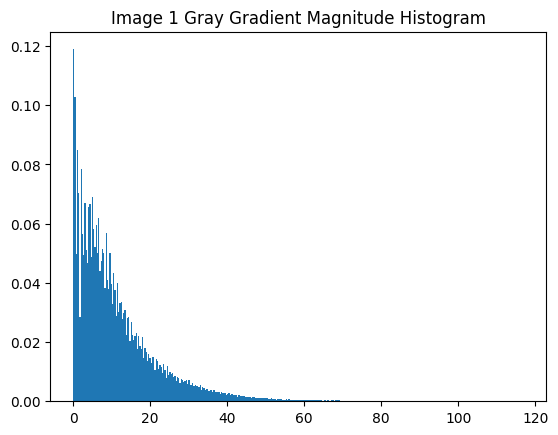

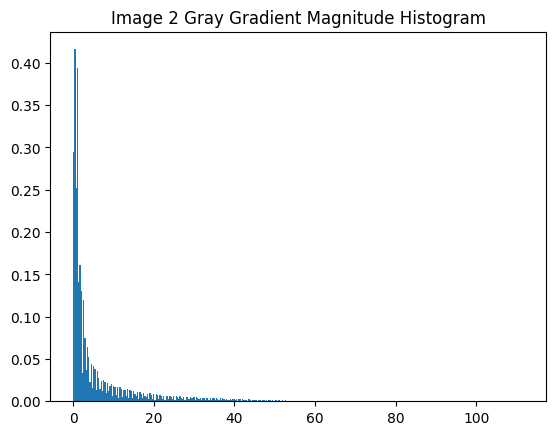

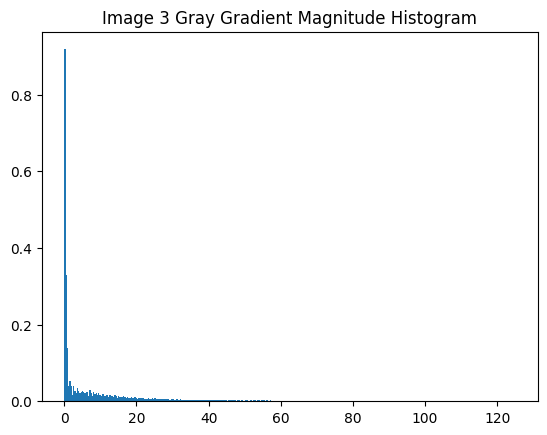

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

def calculate_gray_gradient(image_index):
    # Load the input image in grayscale mode
    img = cv2.imread('images/img{}.jpg'.format(image_index), cv2.IMREAD_GRAYSCALE)
    
    # Calculate the gradients in X and Y directions using numpy gradient function
    img_gradient_x, img_gradient_y = np.gradient(img)
    
    # Initialize an empty array to store the gradient magnitude values
    img_gradient_magnitude = np.zeros(img.shape)
    
    # Calculate the gradient magnitude for each pixel using the formula sqrt(Ix^2 + Iy^2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_gradient_magnitude[i][j] = math.sqrt(pow(img_gradient_x[i][j], 2) + pow(img_gradient_y[i][j], 2))
    
    # Display the gradient magnitude histogram
    plt.hist(img_gradient_magnitude.ravel(), bins=360, density=True)
    plt.title('Image {} Gray Gradient Magnitude Histogram'.format(image_index))
    
    # Create the 'gradient' folder if it does not exist
    if not os.path.exists('gradient'):
        os.makedirs('gradient')
    plt.savefig("gradient/img{}_gradient_histogram.jpg".format(image_index))
    plt.show()

for index in range(1, 4):
    calculate_gray_gradient(index)
